In [1]:
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

## 1. Read the data and Descriptive analysis:

According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people)(Centers for Disease Control and Prevention,2021). I hope to use the data and statistical knowledge to learn the indicators of heart disease and find the best model to predict/judge whether the people have the heart disease.

Originally, the dataset comes from the CDC in 2020 and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. In this project, I will use the kaggle data from Kamil Pylak and the dataset contains the most relevant variables from the original one and was cleaned roughly. 

In [2]:
heart = pd.read_csv("heart_2020_cleaned.csv")
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
heart.iloc[:,np.r_[0,2:5,7:14,15:18]].head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [6]:
for feature in heart.iloc[:,np.r_[0,2:18]].columns:
    print(feature)
    print(heart[feature].unique(),"\n")

HeartDisease
['No' 'Yes'] 

Smoking
['Yes' 'No'] 

AlcoholDrinking
['No' 'Yes'] 

Stroke
['No' 'Yes'] 

PhysicalHealth
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.] 

MentalHealth
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.] 

DiffWalking
['No' 'Yes'] 

Sex
['Female' 'Male'] 

AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity
['Yes' 'No'] 

GenHealth
['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

SleepTime
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.] 

Asthma
['Yes' 'No'] 

KidneyDisease
['No' 'Yes'] 

SkinCancer
['Yes' 

## 2. Preprocessing Data
First of all, we change the contains of each unnumerical features into numbers for the further regression and predictive models.

In [7]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
heart["HeartDisease"]= label_encoder.fit_transform(heart["HeartDisease"])
heart["Smoking"]= label_encoder.fit_transform(heart["Smoking"])
heart["AlcoholDrinking"]= label_encoder.fit_transform(heart["AlcoholDrinking"])
heart["Stroke"]= label_encoder.fit_transform(heart["Stroke"])
heart["DiffWalking"]= label_encoder.fit_transform(heart["DiffWalking"])
heart["Sex"]= label_encoder.fit_transform(heart["Sex"])
heart["AgeCategory"]= label_encoder.fit_transform(heart["AgeCategory"])
heart["Race"]= label_encoder.fit_transform(heart["Race"])
heart["Diabetic"]= label_encoder.fit_transform(heart["Diabetic"])
heart["PhysicalActivity"]= label_encoder.fit_transform(heart["PhysicalActivity"])
heart["GenHealth"]= label_encoder.fit_transform(heart["GenHealth"])
heart["Asthma"]= label_encoder.fit_transform(heart["Asthma"])
heart["KidneyDisease"]= label_encoder.fit_transform(heart["KidneyDisease"])
heart["SkinCancer"]= label_encoder.fit_transform(heart["SkinCancer"])


In [8]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


### 2.1 Unbalance dataset

Text(0.5, 0.98, 'Pie Plot about HeartDisease')

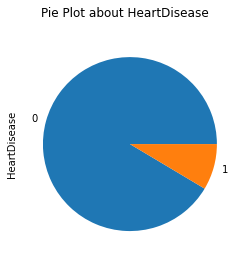

In [9]:
heart.groupby('HeartDisease').HeartDisease.count().plot(kind= 'pie')
plt.suptitle('Pie Plot about HeartDisease')

In [10]:
X, y = heart.loc[:, heart.columns != 'HeartDisease'], heart['HeartDisease']
ncr = RandomUnderSampler(sampling_strategy=0.5)
X_ncr, y_ncr =ncr.fit_resample(X,y)

In [11]:
X_ncr.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,25.69,0,0,0,0.0,0.0,0,0,1,2,0,1,4,6.0,0,0,0
1,25.61,1,0,0,0.0,0.0,0,0,10,5,0,0,2,6.0,0,0,0
2,35.43,1,0,0,0.0,10.0,0,0,4,5,0,1,0,1.0,0,0,0
3,35.07,0,0,0,0.0,2.0,0,0,8,5,2,1,2,7.0,0,0,0
4,29.41,0,0,0,0.0,0.0,0,1,10,5,0,1,4,8.0,0,0,0


In [12]:
X_ncr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82119 entries, 0 to 82118
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BMI               82119 non-null  float64
 1   Smoking           82119 non-null  int64  
 2   AlcoholDrinking   82119 non-null  int64  
 3   Stroke            82119 non-null  int64  
 4   PhysicalHealth    82119 non-null  float64
 5   MentalHealth      82119 non-null  float64
 6   DiffWalking       82119 non-null  int64  
 7   Sex               82119 non-null  int64  
 8   AgeCategory       82119 non-null  int64  
 9   Race              82119 non-null  int64  
 10  Diabetic          82119 non-null  int64  
 11  PhysicalActivity  82119 non-null  int64  
 12  GenHealth         82119 non-null  int64  
 13  SleepTime         82119 non-null  float64
 14  Asthma            82119 non-null  int64  
 15  KidneyDisease     82119 non-null  int64  
 16  SkinCancer        82119 non-null  int64 

Text(0.5, 0.98, 'Pie Plot about HeartDisease')

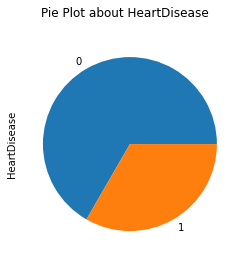

In [13]:
y_ncr.groupby(y_ncr).count().plot(kind= 'pie')
plt.suptitle('Pie Plot about HeartDisease')

In [14]:
print(f'After undersampling: {Counter(y_ncr)}')

After undersampling: Counter({0: 54746, 1: 27373})


### 2.2 Multicollinearity problem

In [15]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_ncr.values, i) for i in range(X_ncr.shape[1])]
vif['variable'] = X_ncr.columns

In [16]:
vif

,VIF,variable
0,15.044552,BMI
1,1.986906,Smoking
2,1.088337,AlcoholDrinking
3,1.158682,Stroke
4,1.761105,PhysicalHealth
5,1.457302,MentalHealth
6,1.865118,DiffWalking
7,2.088259,Sex
8,6.808869,AgeCategory
9,13.494374,Race


In [17]:
vif.iloc[[0,9,13]]

,VIF,variable
0,15.044552,BMI
9,13.494374,Race
13,15.767640,SleepTime


In [18]:
X_ncr_new = X_ncr.loc[:, X_ncr.columns!="BMI"]
X_ncr_new = X_ncr_new.loc[:, X_ncr_new.columns!="SleepTime"]
X_ncr_new = X_ncr_new.loc[:, X_ncr_new.columns!="Race"]

In [19]:
X_ncr_new

,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0,0,0,0.0,0.0,0,0,1,0,1,4,0,0,0
1,1,0,0,0.0,0.0,0,0,10,0,0,2,0,0,0
2,1,0,0,0.0,10.0,0,0,4,0,1,0,0,0,0
3,0,0,0,0.0,2.0,0,0,8,2,1,2,0,0,0
4,0,0,0,0.0,0.0,0,1,10,0,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82114,0,0,1,30.0,15.0,1,0,7,2,1,3,1,0,0
82115,1,0,0,0.0,0.0,1,0,11,2,1,2,0,0,0
82116,1,0,0,0.0,0.0,0,1,3,0,1,4,0,0,0
82117,1,0,0,0.0,0.0,0,0,8,2,1,4,1,0,0


In [20]:
vif1 = pd.DataFrame()
vif1['VIF'] = [variance_inflation_factor(X_ncr_new.values, i) for i in range(X_ncr_new.shape[1])]
vif1['variable'] = X_ncr_new.columns
vif1

,VIF,variable
0,1.956210,Smoking
1,1.080379,AlcoholDrinking
2,1.156072,Stroke
3,1.753678,PhysicalHealth
4,1.401495,MentalHealth
5,1.826302,DiffWalking
6,1.939017,Sex
7,4.637170,AgeCategory
8,1.416935,Diabetic
9,3.018857,PhysicalActivity


## 4. Statistical Analysis
From the former visualization of two group people( have heartdisease or not have), we can see that there is differences between them. To confirm that we can cluster two group of people using our dataset, we use the manova test to show the result. We set the null hypothesis testing as there is no difference between two group people.

In [21]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('Smoking + AlcoholDrinking + Stroke + PhysicalHealth + MentalHealth + DiffWalking + Sex + AgeCategory + Diabetic + PhysicalActivity + GenHealth + Asthma + KidneyDisease + SkinCancer ~ HeartDisease', data=heart)
print(fit.mv_test())

                      Multivariate linear model
                                                                      
----------------------------------------------------------------------
       Intercept         Value   Num DF    Den DF     F Value   Pr > F
----------------------------------------------------------------------
          Wilks' lambda  0.0792 14.0000 319780.0000 265514.1085 0.0000
         Pillai's trace  0.9208 14.0000 319780.0000 265514.1085 0.0000
 Hotelling-Lawley trace 11.6242 14.0000 319780.0000 265514.1085 0.0000
    Roy's greatest root 11.6242 14.0000 319780.0000 265514.1085 0.0000
----------------------------------------------------------------------
                                                                      
----------------------------------------------------------------------
         HeartDisease      Value   Num DF    Den DF    F Value  Pr > F
----------------------------------------------------------------------
             Wilks' lambda 0.

## 5. Predictive Analysis
In the final part of report, we hope to find out the best machine learning model to judge/predict whether people have heart disease. In our experiment, we compare decision tree, random forest, knn and logistic regression algorithm. For decision tree, random forest and knn algorithms, we use the randomized search cross-validation to find the variables which makes the model fits our datasets well. Finally, we use the ROC curve to find out the best predictive models.

In [22]:
X_train, X_test,y_train,y_test = train_test_split(X_ncr_new,y_ncr,test_size=0.40,random_state=42)

### 5.1 Decision Tree

In [23]:
# Import necessary modules
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 7}
Best score is 0.7498733626626061


In [24]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = None, max_features = 4, min_samples_leaf = 6)
clf.fit(X_test, y_test)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19208  2717]
 [ 3992  6931]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     21925
           1       0.72      0.63      0.67     10923

    accuracy                           0.80     32848
   macro avg       0.77      0.76      0.76     32848
weighted avg       0.79      0.80      0.79     32848



In [25]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob)

The accuracy of the best decision tree to test data set is 0.807.

In [26]:
(19441+6922)/32848


0.8025754992693619

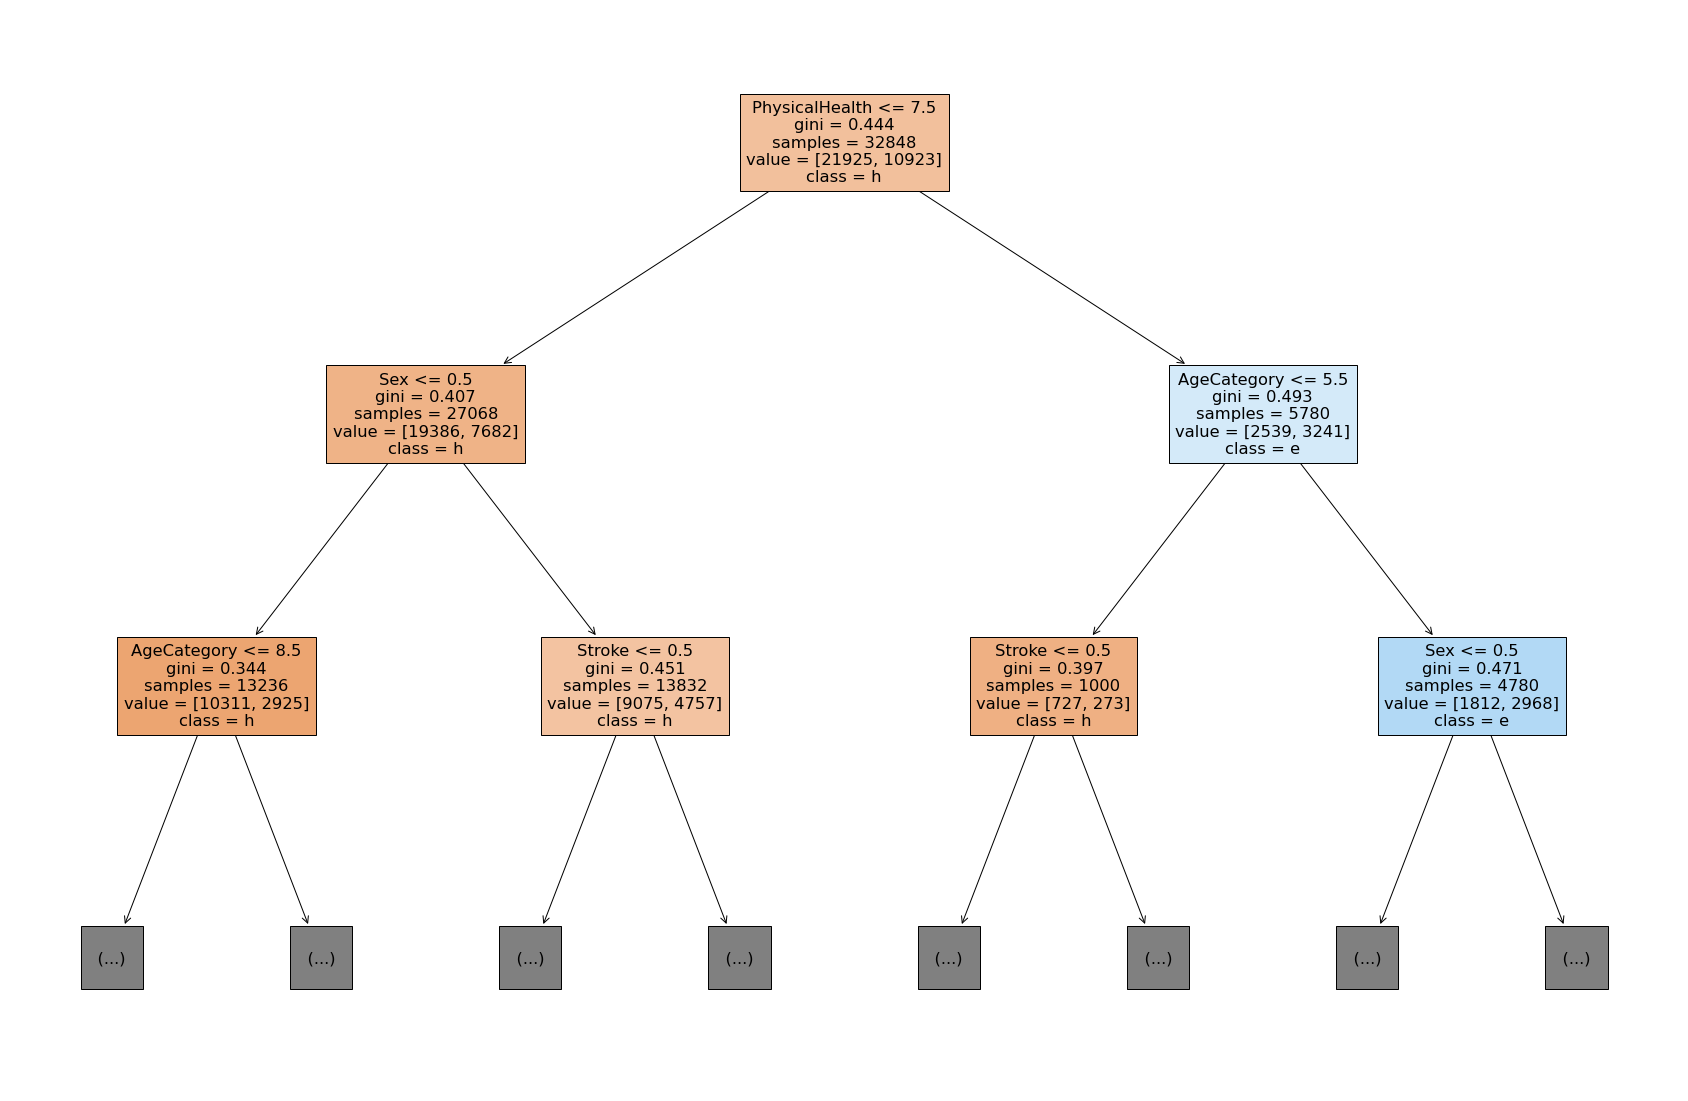

In [27]:
fig = plt.figure(figsize = (30,20))
_ = tree.plot_tree(clf, 
                   max_depth = 2,
                   feature_names=X_test.columns,  
                   class_names="heartdisease",
                   filled=True)

In [28]:
fig.savefig("decistion_tree.png")

### 5.2 Random Forest 

In [29]:
#grid search
from sklearn.ensemble import RandomForestClassifier
parameters = {  
    'n_estimators': [24,28,32],   
    'max_features': ('sqrt','log2','auto'), 
    'max_depth':    (5,10,15),     
    'criterion'   : ['gini', 'entropy'],
}
RandomForest = RandomForestClassifier()
RandomForestgridsearch = RandomizedSearchCV(RandomForest,     
                          parameters, 
                          cv = 2,    
                         )
RandomForestgridsearch.fit(X_train, y_train)

print("Tuned Decision Tree Parameters: {}".format(RandomForestgridsearch.best_params_))
print("Best score is {}".format(RandomForestgridsearch.best_score_))




Tuned Decision Tree Parameters: {'n_estimators': 32, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'}
Best score is 0.7680583103669146


In [30]:
RandomForestnew = RandomForestClassifier(n_estimators = 32, max_features = 'sqrt', max_depth = 10, criterion = 'gini')
RandomForestnew.fit(X_test, y_test)
y_pred = RandomForestnew.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19407  2518]
 [ 4347  6576]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     21925
           1       0.72      0.60      0.66     10923

    accuracy                           0.79     32848
   macro avg       0.77      0.74      0.75     32848
weighted avg       0.79      0.79      0.79     32848



In [31]:
(19440+6678)/32848


0.7951169020944958

In [32]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = RandomForestnew.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob)

The accuracy of the best random forest to test data set is 0.798. 

### 5.3 KNN 

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

parameters = {
    'n_neighbors': np.arange(1, 9)
}

knn = KNeighborsClassifier()

KNNgridsearch = GridSearchCV(knn,     
                             parameters, 
                             cv = 8
                            )
KNNgridsearch.fit(X_train, y_train)

print("Tuned Decision Tree Parameters: {}".format(KNNgridsearch.best_params_))
print("Best score is {}".format(KNNgridsearch.best_score_))

Tuned Decision Tree Parameters: {'n_neighbors': 7}
Best score is 0.739786131808261


In [37]:
KNNnew = KNeighborsClassifier(n_neighbors = 7)
KNNnew.fit(X_test, y_test)
y_pred = KNNnew.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19161  2764]
 [ 4193  6730]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85     21925
           1       0.71      0.62      0.66     10923

    accuracy                           0.79     32848
   macro avg       0.76      0.75      0.75     32848
weighted avg       0.78      0.79      0.78     32848



In [38]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = KNNnew.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob)


In [39]:
(19161+6730)/32848

0.7882062834875792

### 5.4 Logistic Regression

In [40]:
logreg = LogisticRegression(max_iter = 500, class_weight = "balanced")

# Fit it to the training data
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

[[16223  5702]
 [ 2673  8250]]
              precision    recall  f1-score   support

           0       0.86      0.74      0.79     21925
           1       0.59      0.76      0.66     10923

    accuracy                           0.75     32848
   macro avg       0.72      0.75      0.73     32848
weighted avg       0.77      0.75      0.75     32848

Test set score: 0.745


In [41]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred_prob)

In [42]:
print(logreg.coef_, logreg.intercept_)

[[ 0.45104811 -0.21941701  1.34290028  0.02738296  0.01351143  0.48006816
   0.81503708  0.29501412  0.32314307 -0.13370482 -0.0434636   0.39952469
   0.74004771  0.13965414]] [-3.48730984]


In [43]:
X_test.head()

,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
26687,0,0,0,0.0,0.0,0,0,2,0,1,4,0,0,0
10054,0,0,0,0.0,0.0,0,1,5,0,1,4,0,0,0
8514,1,1,0,2.0,7.0,0,0,6,0,1,4,0,0,1
45912,1,1,0,0.0,0.0,0,1,3,0,0,1,0,0,0
62779,0,0,0,0.0,0.0,1,0,9,0,1,4,0,0,1


### 5.5 Comparison¶

Using the ROC Curve plot, we can compare the four popular machine learning algorithm on this dataset. The larger down-right area means the better algorithm.

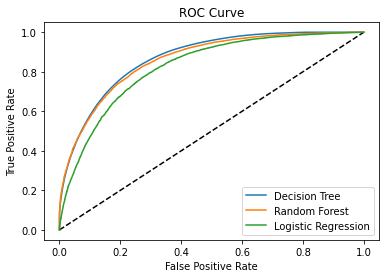

In [44]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1, label = "Decision Tree")
plt.plot(fpr2, tpr2, label = "Random Forest")
# plt.plot(fpr3, tpr3, label = "KNN")
plt.plot(fpr4, tpr4, label = "Logistic Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()